In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Load the NSFG pregnancy file and select live births:

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# Histogram of birth weights

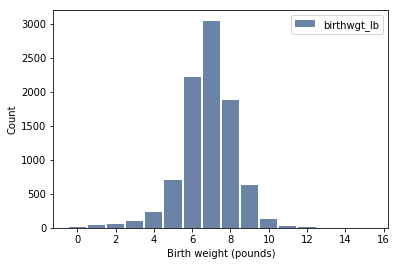

In [3]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

# 3.1 PMFs

To normalize the disrtibution, we could divide through by the total count:

In [4]:
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n

The result is a probability mass function

In [5]:
# thinkplot.Hist(pmf)
# thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

In [6]:
import thinkstats2
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [7]:
#modify Pmf by incrementing the probability associated with a value
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [8]:
# you can also multiply a pmf by a factor
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [9]:
# If you modify a Pmf, the result may not be normalized 
#(the probabilities may no longer add up to 1)
pmf.Total()

0.8999999999999999

In [10]:
# renormalize
pmf.Normalize()
pmf.Total()

1.0

In [11]:
# Here's the PMF of pregnancy length for live births.
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

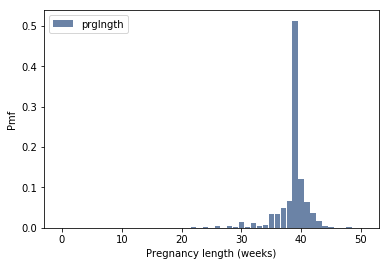

In [12]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

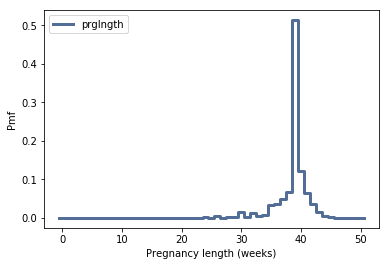

In [13]:
#Here's what it looks like plotted with Pmf, which makes a step function
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [14]:
live, firsts, others = first.MakeFrames()

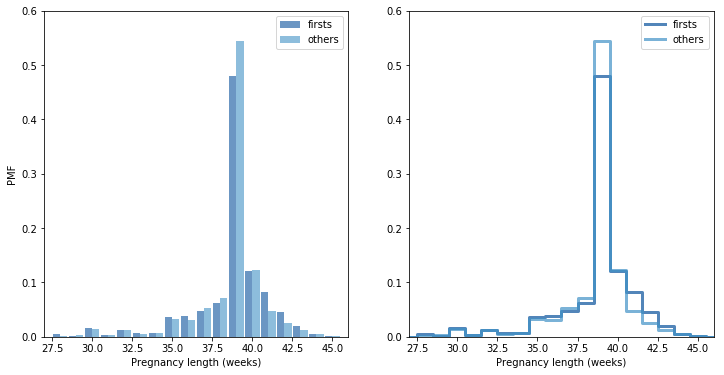

In [15]:
# Distributions of pregnancy length
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

# PMF of pregnancy lengths for first babies and others, using bar graphs and step functions
width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length (weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 


We will plot this graph because the biggest differences in the distributions are near the mode - so when we zoom in the graph, we will have a better understanding about the dataset.

No handlers could be found for logger "matplotlib.legend"


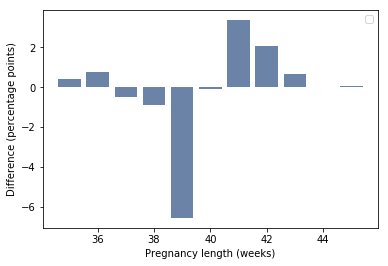

In [16]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Difference (percentage points)')

In [17]:
# first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42
# we can't be sure this effect is real; it might be due to random variation

# 3.4 Class size paradox

In [18]:
#keys are the median value of the class size
#values are the number of classes with that size (count)
d = { 7: 8, 12: 8, 17: 14, 22: 4,
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

In [19]:
pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.6923076923


if you survey a group of student and ask them how many students are in their classes, and compute the mean, the mean would be biased

In [20]:
def BiasPmf(pmf, label):
    '''This function computes biased PMF we would get if we surveyed students and asked about the size of the classes they are in.'''
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

For each class size, x, we multiply the probability by x, the number of students who observe that class size.

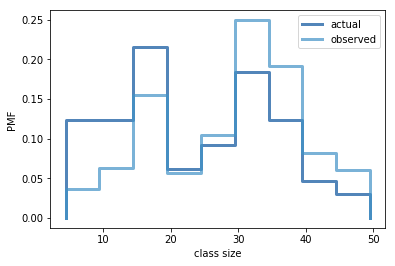

In [21]:
#Let's plot the actual and observed class size distribution
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

 Question:This happens because you surveyed more people from some classes, and less from others?

In [22]:
def UnbiasPmf(pmf, label):
    '''This function would help to estimate the actual distribution of the class mean.
    It would be useful in case you don't have real information and would need to rely on data from surveys.'''
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

This function is similar to BiasPmf, the only difference is that it divides each probability by X instead of multiplying it.

# 3.5 DF Indexing

In [23]:
import numpy as np
import pandas as pd

In [24]:
array = np.random.randn(4,2)
df = pd.DataFrame(array)
df

,0,1
0,0.017315,-0.033175
1,-0.322276,1.073124
2,0.048493,1.718966
3,0.555734,-0.866975


In [25]:
columns = ['A','B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,0.017315,-0.033175
1,-0.322276,1.073124
2,0.048493,1.718966
3,0.555734,-0.866975


In [26]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.017315,-0.033175
b,-0.322276,1.073124
c,0.048493,1.718966
d,0.555734,-0.866975


In [27]:
#select column
df['A']

a    0.017315
b   -0.322276
c    0.048493
d    0.555734
Name: A, dtype: float64

In [28]:
#select row
df.loc['a']

A    0.017315
B   -0.033175
Name: a, dtype: float64

In [29]:
df.iloc[0]

A    0.017315
B   -0.033175
Name: a, dtype: float64

In [30]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.017315,-0.033175
c,0.048493,1.718966


In [31]:
df['a':'c']

,A,B
a,0.017315,-0.033175
b,-0.322276,1.073124
c,0.048493,1.718966


In [32]:
df[0:2]

,A,B
a,0.017315,-0.033175
b,-0.322276,1.073124


# Exercises

In [35]:
resp = nsfg.ReadFemResp()

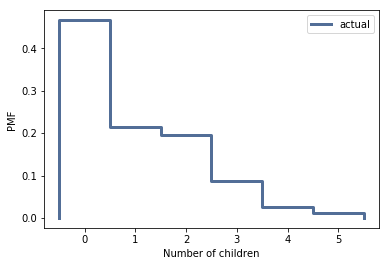

In [49]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')
#plot number of children per house
# actual distribution of number of children per family
thinkplot.Pmf(pmf, label='actual')
thinkplot.Config(xlabel='Number of children', ylabel='PMF')
# thinkplot.Save(root='1')

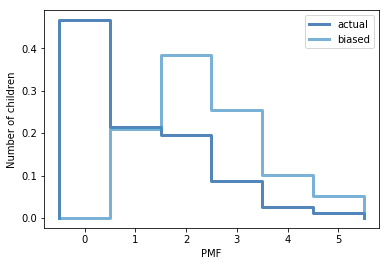

Writing 2.pdf
Writing 2.eps


In [51]:
# calculate biased distribution
biased = BiasPmf(pmf, 'biased')

#plot biased and actual data together
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show(xlabel='PMF', ylabel='Number of children')
# thinkplot.Save(root='2')

In [45]:
#compare means from biased and real data
print(pmf.Mean(), biased.Mean())

1.02420515504 2.40367910066


In this exercise, we can see the effect of the 'class size paradox'.  
If we interview a group of people and ask them how many children their parents have, we would have a biased conclusion of the mean, and therefore, a biased data collection.  
To avoid this kind of misinterpretation, we need to make sure that the data we are using in a study was collected right.  